# Tone comparison

May 26, 2018

Reference: https://dzone.com/articles/sound-synthesis-numpy

In [270]:
%matplotlib inline

from numpy import linspace, sin, pi, int16, append, hanning, kaiser
from scipy.io.wavfile import write

In [280]:
SAMPLING_RATE = 48000  # Hz
TQ = 0.02  # Time quantum in sec
SEGMENT = TQ * 4  # TQ * N, N >=4
AMPLITUDE = 10000

## Tone synthesis

In [281]:
def note(freqs, length, amp=1, rate=SAMPLING_RATE):
    t = linspace(0, length, int(length * rate))
    data = sin(2 * pi * freqs[0] * t) * amp
    if (len(freqs) > 1):
        for freq in freqs[1:]:
            data += sin(2 * pi * freq * t) * amp
    return data.astype(int16) # two byte integers

def chirp(f1, f2, length, amp=1, rate=SAMPLING_RATE):
    t = linspace(0, length, int(length * rate))
    delta = float(f2 - f1)/float(length)
    freq = f1 + delta * t
    data = sin(2 * pi * freq * t) * amp
    return data.astype(int16) # two byte integers

## Tone signal

### Symbols

In [282]:
symbols = {"START_OF_FRAME": 16650, "END_OF_FRAME": 16845, "0":17041, "1": 17236, "2": 17431, "3": 17626, "4": 17822, "5": 18017,
           "6": 18212, "7": 18408, "8": 18603, "9": 18798, "A": 18994, "B": 19189, "C": 19384, "D": 19580,
           "E": 19775, "F": 19970}

In [283]:
def signal(data):
    tone = note([symbols["START_OF_FRAME"]], SEGMENT, amp=AMPLITUDE)
    for d in data:
        tone = append(tone, note([symbols[d]], SEGMENT, amp=AMPLITUDE))
    tone = append(tone, note([symbols["END_OF_FRAME"]], SEGMENT, amp=AMPLITUDE))
    tone = append(tone, note([symbols["END_OF_FRAME"]], SEGMENT, amp=AMPLITUDE))
    tone = append(tone, note([symbols["END_OF_FRAME"]], SEGMENT, amp=AMPLITUDE))
    return tone

## Tone generation

In [284]:
WAV_FILE = 'ToneComparison.wav'

In [285]:
# Generate message
tone = signal(["START_OF_FRAME", "END_OF_FRAME", "0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "A", "B", "C", "D", "E", "F"])
# Save it as a wav file on PC
write(WAV_FILE, SAMPLING_RATE, tone)

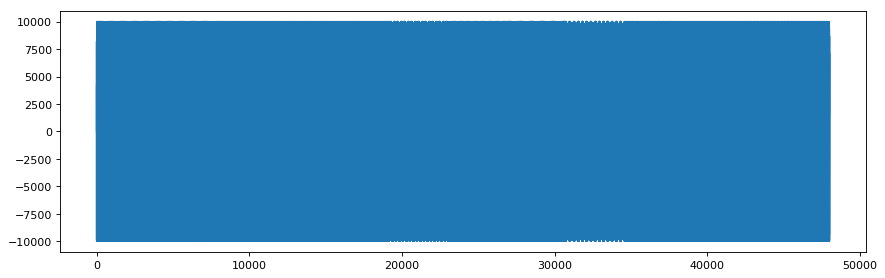

In [286]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13, 4), dpi=80)
plt.plot(tone[0:48000])

## Chirp modulation

In [287]:
WAV_FILE = 'Chirp.wav'
tone = chirp(16000, 18000, TQ, amp=AMPLITUDE)
write(WAV_FILE, SAMPLING_RATE, tone)

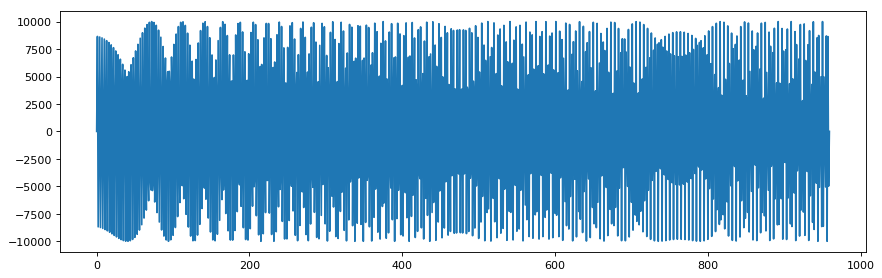

In [288]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13, 4), dpi=80)
plt.plot(tone[0:48000])

## Symbols (Chirp modulation)

In [301]:
F1 = 16000
F2 = 18000

def tq_1():
    return chirp(F1, F2, TQ, amp=AMPLITUDE)
def tq_0():
    return chirp(0, 0, TQ, amp=AMPLITUDE)

In [302]:
def signal_chirp(data):
    tone = tq_1()
    tone = append(tone, tq_1())
    tone = append(tone, tq_1())
    tone = append(tone, tq_1())
    tone = append(tone, tq_0())    
    for d in data:
        if d == 0:
            tone = append(tone, tq_0())
            tone = append(tone, tq_0())
            tone = append(tone, tq_0())
        else:
            tone = append(tone, tq_1())
            tone = append(tone, tq_1())
            tone = append(tone, tq_1())
    tone = append(tone, tq_0())
    tone = append(tone, tq_0())
    tone = append(tone, tq_0())
    tone = append(tone, tq_0())                
    return tone

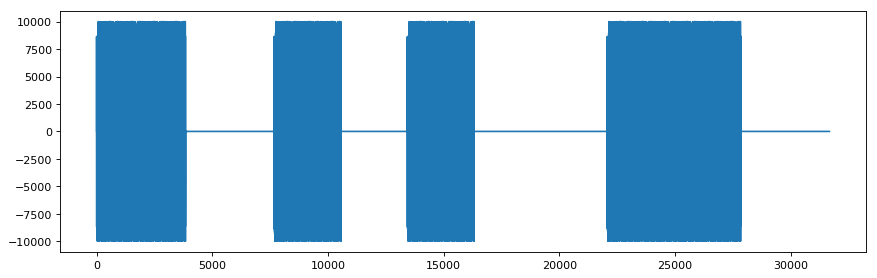

In [307]:
tone_chirp = signal_chirp([0, 1, 0, 1, 0, 0, 1, 1])  # Ascii "S" character code
plt.figure(figsize=(13, 4), dpi=80)
plt.plot(tone_chirp)

In [308]:
WAV_FILE = 'ChirpSignal.wav'
write(WAV_FILE, SAMPLING_RATE, tone_chirp)